In [ ]:
#install pycryptodome
!pip install pycryptodome

In [ ]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

# Task 1
Complete the encrypt() method

Mode:



*   1 = ECB
*   2 = CBC
*   3 = OFB




In [ ]:
def encrypt(pt: bytes, key: bytes, mode:int, iv: bytes=None) -> bytes:
  # Write your code here
  # You can directly use Pad function
    pt = pad(pt, AES.block_size)


    if mode == 1:
        cipher = AES.new(key, AES.MODE_ECB)

    elif mode == 2:
        cipher = AES.new(key, AES.MODE_CBC, iv)

    elif mode == 3:
        cipher = AES.new(key, AES.MODE_OFB, iv)

    ct = cipher.encrypt(pt)
    return ct




# Task 2
Complete the decrypt method

In [ ]:
def decrypt(ct: bytes, key: bytes, mode: int, iv: bytes=None) -> bytes:
    # Write your code here
    # You can directly use Unpad function

    if mode == 1:
        cipher = AES.new(key, AES.MODE_ECB)

    elif mode == 2:
        cipher = AES.new(key, AES.MODE_CBC, iv)

    elif mode == 3:
        cipher = AES.new(key, AES.MODE_OFB, iv)


    pt_padded = cipher.decrypt(ct)
    pt = unpad(pt_padded, AES.block_size)
    return pt


Key: **0d5b4267c2370ecf67bd9b9bdba7bfe0**


IV: **662bc70aab50862d984d2cce641bb1e9**


plaintext: **435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5**

In [ ]:
pt = "435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5"
key = "0d5b4267c2370ecf67bd9b9bdba7bfe0"
iv = "662bc70aab50862d984d2cce641bb1e9"

In [ ]:
ct = encrypt(pt.encode(),bytes.fromhex(key),1).hex()
try:
  assert(ct=="a8eeba8300fe4570882554c0d804959c9c6d5e7c440c5023ab5cff6be12ca8efc72a447f76475ced61462f307372aaf8")
  print("[ECB]: Test passed")
except:
  print("[ECB]: Wrong answer")

ct2 = encrypt(pt.encode(),bytes.fromhex(key),2,bytes.fromhex(iv)).hex()
try:
  assert(ct2=="880853b4e42a86bc1419b2ec8e349515f3484d312f14f301c6567d71b94dc52cc183cfbede586ab023b7e6831b9351ee")
  print("[CBC]: Test passed")
except:
  print("[CBC]: Wrong answer")

ct3 = encrypt(pt.encode(),bytes.fromhex(key),3,bytes.fromhex(iv)).hex()
try:
  assert(ct3=="869e86fd9b35a401716129b38528ca139fc412b308e996660ab5bf38ed3c3650f5fb1d0003f9431bfa8a2c0561ce00fe")
  print("[OFC]: Test passed")
except:
  print("[OFC]: Wrong answer")

TypeError: unsupported operand type(s) for %: 'int' and 'NoneType'

In [ ]:
pt1 = decrypt(bytes.fromhex(ct),bytes.fromhex(key),1).decode()
try:
  assert(pt1=="435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5")
  print("[ECB]: Test passed")
except:
  print("[ECB]: Wrong answer")

pt2 = decrypt(bytes.fromhex(ct2),bytes.fromhex(key),2,bytes.fromhex(iv)).decode()
try:
  assert(pt2=="435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5")
  print("[CBC]: Test passed")
except:
  print("[CBC]: Wrong answer")

pt3 = decrypt(bytes.fromhex(ct3),bytes.fromhex(key),3,bytes.fromhex(iv)).decode()
try:
  assert(pt3=="435_15_fun_1f_y0u_kn0w_h0w_17_w0rk5")
  print("[OFC]: Test passed")
except:
  print("[OFC]: Wrong answer")

[ECB]: Test passed
[CBC]: Test passed
[OFC]: Test passed


# Task 3

Encrypt the downloaded image using ECB and CBC mode and compare

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving original.bmp to original (1).bmp


In [ ]:
import PIL

def view_image(filename):
  img = PIL.Image.open(filename)
  display(img)

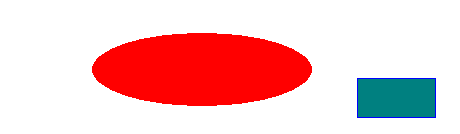

In [ ]:
with open("original.bmp", "rb") as f:
  pt = f.read()

view_image("original.bmp")

In [ ]:
key = b'\r[Bg\xc27\x0e\xcfg\xbd\x9b\x9b\xdb\xa7\xbf\xe0'
iv = b'\xb6p\x08c-\xa3\xbc)W\x82\x92\x9az\x06e\x85'

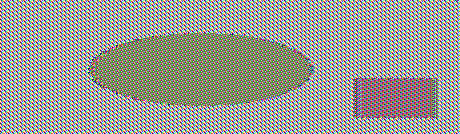

In [ ]:
ct = encrypt(pt,key,1)
ct = list(ct)
ct[:54] = list(pt)[:54] #First 54 bytes are bmp header (Needs to be correct for viewing)
ct = bytes(ct)
with open("encrypted_ecb.bmp", "wb") as f:
  f.write(ct)

view_image("encrypted_ecb.bmp")

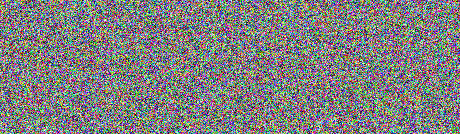

In [ ]:
ct = encrypt(pt,key,2,iv)
ct = list(ct)
ct[:54] = list(pt)[:54]
ct = bytes(ct)
with open("encrypted_cbc.bmp", "wb") as f:
  f.write(ct)

view_image("encrypted_cbc.bmp")

# Task 4

Compare decrypted texts of different encryption modes when encrypted data is corrupted

In [ ]:
pt = "CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447"
key = b'\xb4\xe3\x01\xb7(\x93\x98*\x8b\xf8\xe8D\x80\xa6[\x85'
iv = b'\xb2\xeb~\xb3|d]\xa6B\x7f\x18\x9b\xac\xf2\xe0\x14'

In [ ]:
# Encrypt using ECB
ct1 = encrypt(pt.encode(),key,1)
ct1 = list(ct1)
ct1[29] = ct1[29] ^ 0x01
ct1[33] = ct1[33] ^ 0x01
ct1 = bytes(ct1)
with open("enc_cbc", "wb") as f:
  f.write(ct1)

# decrypt using ECB
pt1 = decrypt(ct1,key,1)
print(pt1)

b'CSE447CSE447CSE4\xe4\xa3\xb9\x08S\xd9\xb1\xeb3\xfc.p\xeerKv\xcf\xf6i\x03\x90\xa8B\xc1\x11\xda\xfb\xf7\x82r\xec\xe6CSE447CSE447CSE447CSE447'


In [ ]:
# Encrypt using CBC
ct2 = encrypt(pt.encode(),key,2,iv)
ct2 = list(ct2)
ct2[29] = ct2[29] ^ 0x01
ct2 = bytes(ct2)
with open("enc_cbc", "wb") as f:
  f.write(ct2)

# decrypt using CBC
pt2 = decrypt(ct2,key,2,iv)
print(pt2)

b'CSE447CSE447CSE4\xf5h\x92c^]\xfc\x91\xf4\x97\x97\x87\x1f\xf0\xca\x92E447CSE447CSE547CSE447CSE447CSE447CSE447'


In [ ]:
# Encrypt using OFB
ct3 = encrypt(pt.encode(),key,3,iv)
ct3 = list(ct3)
ct3[29] = ct3[29] ^ 0x01
ct3 = bytes(ct3)
with open("enc_cbc", "wb") as f:
  f.write(ct3)

# decrypt using OFB
pt3 = decrypt(ct3,key,3,iv)
print(pt3)

b'CSE447CSE447CSE447CSE447CSE446CSE447CSE447CSE447CSE447CSE447CSE447CSE447'


In [ ]:
plain_text = "CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447CSE447"
plain_bytes = plain_text.encode()

corrupted = b'CSE447CSE447CSE4\xf5h\x92c^]\xfc\x91\xf4\x97\x97\x87\x1f\xf0\xca\x92E447CSE447CSE547CSE447CSE447CSE447CSE447'

error_1 = 0
error_2 = 0
error_3 = 0

for i in range(len(plain_text)):

    if plain_bytes[i] != pt1[i]:
        error_1 += 1

    if plain_bytes[i] != pt2[i]:
        error_2 += 1

    if plain_bytes[i] != pt3[i]:
        error_3 += 1



print(error_1/len(plain_text))

print(error_2/len(plain_text))

print(error_3/len(plain_text))

0.4444444444444444
0.2361111111111111
0.013888888888888888
